In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
from __future__ import print_function
from clawpack.geoclaw import dtopotools
from clawpack.visclaw import animation_tools
from IPython.display import HTML, Image
from clawpack.geoclaw import topotools
import os
CLAW = os.environ['CLAW']
datadir = os.path.join(CLAW,'geoclaw','scratch') # directorio de datos

In [3]:
def set_fault(strike, dip, rake, depth):
    """
    Se definen parámetros de falla.
    Hay parámetros fijos, 
    solo el strike, dip, y rake se van a variar.
    """
    subfault = dtopotools.SubFault()
    subfault.strike = strike
    subfault.dip = dip
    subfault.rake = rake
    subfault.length = 50e3#metros
    subfault.width = 30e3#metros
    subfault.depth = depth
    subfault.slip = 10.#metros
    subfault.longitude = -101.9
    subfault.latitude = 11.87
    subfault.coordinate_specification = "top center"
    #Usa modulo dtopotools de Geoclaw:
    fault = dtopotools.Fault()
    fault.subfaults = [subfault]
    return fault, subfault

#Se crea la falla
fault, subfault = set_fault(0,90,90,1e3)
print("Esta falla tiene %s metros de slip sobre un área de %s por %s km" \
       % (subfault.slip,subfault.length/1e3,subfault.width/1e3))
print("Corresponde a un sismo de magnitud de momento %s" % fault.Mw())
print("La profundidad es de %s km" % (subfault.depth/1e3))

Esta falla tiene 10.0 metros de slip sobre un área de 50.0 por 30.0 km
Corresponde a un sismo de magnitud de momento 7.8187675002557615
La profundidad es de 1.0 km


In [10]:
def plot_okada(strike, dip, rake, depth, verbose=False):
    """
    Se hacen gráficas para mostrar la solución de Okada
    """

    fault,subfault = set_fault(strike, dip, rake, depth)
    ax1 = subplot(2,2,1)
    ax2 = subplot(2,2,2)
    ax3 = subplot(2,2,3)
    ax4 = subplot(2,2,4)

    # Proyección de la fala en superficie
    ax = fault.plot_subfaults(axes=ax1, plot_rake=True, xylim=[-103,-100,11,13])
    text(0.6,0.8,"Strike = %5.1f" % strike, fontsize=12)
    text(0.6,0.6,"Dip = %5.1f" % dip, fontsize=12)
    text(0.6,0.4,"Rake = %5.1f" % rake, fontsize=12)
    text(0.6,0.2,"Depth = %5.1f km" % (depth/1e3), fontsize=12)
    ax1.set_ylabel(u'Latitud')

    #Perfil de profundidad:
    z_top = -subfault.centers[0][2] / 1e3 
    z_bottom = -subfault.centers[2][2] / 1e3 
    ax3.plot([0,cos(subfault.dip*pi/180.)*subfault.width/1.e3], [z_top, z_bottom])
    ax3.set_xlim(-50,150)
    ax3.set_ylim(-55,1)
    ax3.set_xlabel(u'Distancia')
    ax3.set_ylabel(u'Profundidad (km)')
    ax3.set_title(u'Perfil de profundidad de la falla')
    
    
    #Malla de dominio espacial para graficar dz
    x = numpy.linspace(-103, -100, 101)
    y = numpy.linspace(11, 13, 101)
    times = [1.]

    #Mapa de deformación de dz, vista en planta
    fault.create_dtopography(x,y,times,verbose=verbose)
    dtopo = fault.dtopo
    dtopo.plot_dZ_colors(t=1., axes=ax2)
    
    #Sección transversal de deformación
    dZ = dtopo.dZ[-1,50,:]
    ax4.plot(x,dZ)
    ax4.set_ylim(-5,5)
    ax4.set_title(u'Sección transversal')
    ax4.set_xlabel(u'Longitud')
    ax4.set_ylabel(u'Deformación del fondo marino (m)')
    #Se guarda la sección transversal
    archivo = open("DespVertical.txt","w")
    a = dZ
    archivo.write(str((a)))
    archivo.close()

Making Okada dz for each of 1 subfaults
0..
Done


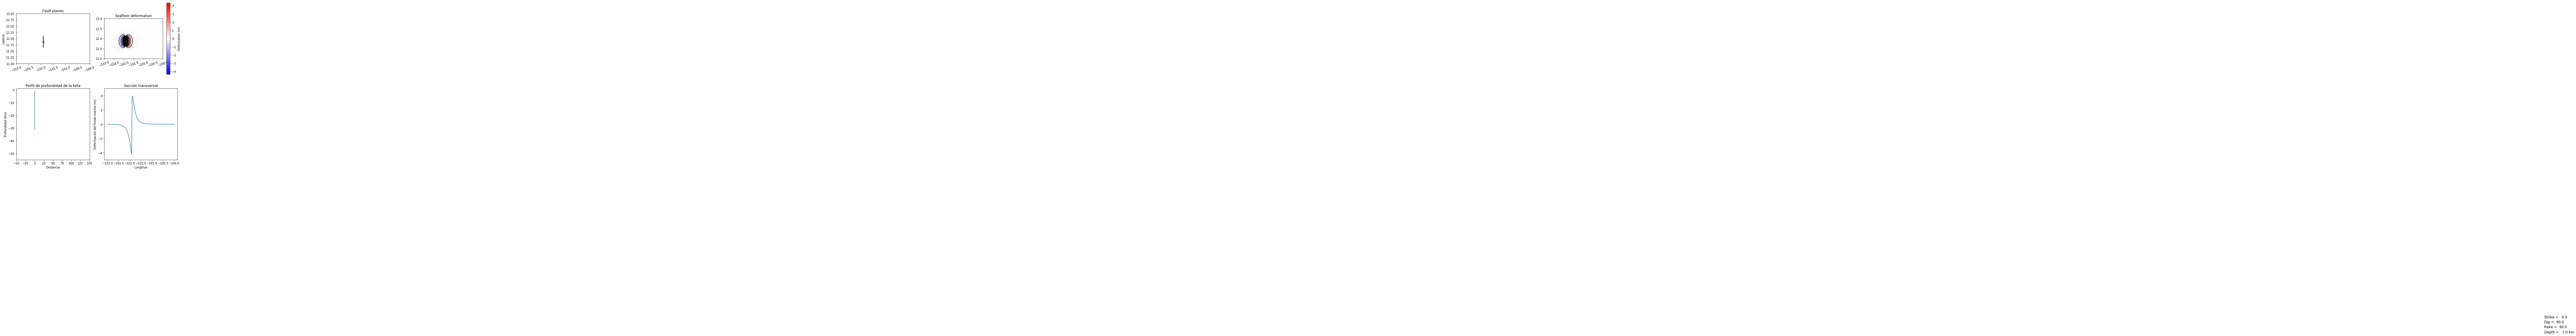

In [11]:
fig=figure(figsize=(10,10))
plot_okada(strike=0, dip=90, rake=90, depth=1e3, verbose=True)

In [12]:
xlower = -103. 
xupper = -101.  # approximate - adjusted below
ylower = 10.
yupper = 12.  # approximate - adjusted below

# dtopo parameters:
points_per_degree = 60  # 1 minute resolution
dx = 1./points_per_degree
mx = int((xupper - xlower)/dx + 1)
xupper = xlower + (mx-1)*dx
my = int((yupper - ylower)/dx + 1)
yupper = ylower + (my-1)*dx

x = linspace(xlower,xupper,mx)
y = linspace(ylower,yupper,my)

In [13]:
dtopo = fault.create_dtopography(x,y,times=[1.], verbose=True)

Making Okada dz for each of 1 subfaults
0..
Done


In [16]:
dtopo_fname = os.path.join(datadir, 'dtopo_Modelo2_GeoclawTesis.tt3')
dtopo.write(dtopo_fname, dtopo_type=3)